# Albumentations Modeling Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, regularizers, optimizers, applications
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras.applications.vgg16 import VGG16

from utils import *


# Function to merge two ImageDataGenerators

In [4]:
datagen = build_datagenerator(dir1="../split/train",
                              dir2="../split/aug",
                              batch_size=32)

Found 32135 images belonging to 2 classes.
Found 6102 images belonging to 2 classes.


In [5]:
val_fldr = '../split/val'
test_fldr = '../split/test2'

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_fldr, 
        target_size = (256, 256),
        batch_size = 32,
        class_mode='binary')

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_fldr, 
        target_size = (256, 256),
        batch_size = 32,
        class_mode='binary')

Found 6626 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


## Sequential API

In [6]:
def create_model(input_shape):
    return models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='softmax')])

        # sigmoid also

model = create_model((256, 256, 3))

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate=0.01),
              metrics = ['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC(), tf.metrics.AUC(curve='PR')],
              run_eagerly = True)

In [7]:
history = model.fit(datagen, 
                      epochs = 5,
                      steps_per_epoch = 20,
                      validation_data = val_generator,
                      validation_steps = 20)

Epoch 1/5
20/20 [==============================] - 263s 13s/step - loss: 109.8807 - accuracy: 0.6963 - precision: 0.6963 - recall: 1.0000 - auc: 0.5000 - auc_1: 0.6963 - val_loss: 0.6728 - val_accuracy: 0.9750 - val_precision: 0.9750 - val_recall: 1.0000 - val_auc: 0.5000 - val_auc_1: 0.9750
Epoch 2/5
20/20 [==============================] - 279s 14s/step - loss: 0.6850 - accuracy: 0.6587 - precision: 0.6587 - recall: 1.0000 - auc: 0.5000 - auc_1: 0.6587 - val_loss: 0.6381 - val_accuracy: 0.9703 - val_precision: 0.9703 - val_recall: 1.0000 - val_auc: 0.5000 - val_auc_1: 0.9703
Epoch 3/5
20/20 [==============================] - 263s 13s/step - loss: 0.6720 - accuracy: 0.6588 - precision: 0.6588 - recall: 1.0000 - auc: 0.5000 - auc_1: 0.6588 - val_loss: 0.5869 - val_accuracy: 0.9750 - val_precision: 0.9750 - val_recall: 1.0000 - val_auc: 0.5000 - val_auc_1: 0.9750
Epoch 4/5
20/20 [==============================] - 265s 14s/step - loss: 0.6602 - accuracy: 0.6547 - precision: 0.6547 - reca

Text(0.5, 1.0, 'PR AUC Score')

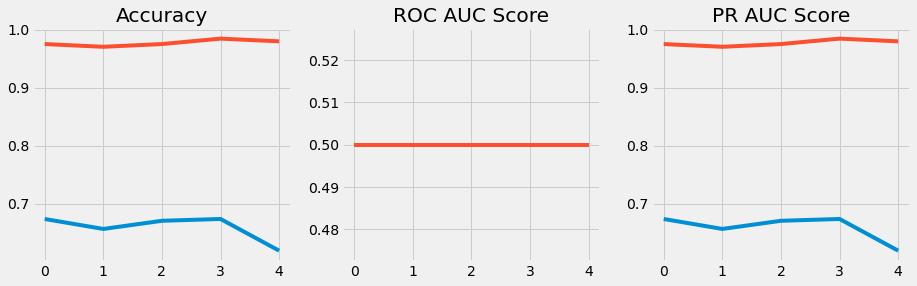

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax3.plot(history.history['auc_1'])
ax3.plot(history.history['val_auc_1']) 
ax1.set_title('Accuracy')
ax2.set_title('ROC AUC Score')
ax3.set_title('PR AUC Score')

### Functional API

In [22]:
input = keras.Input(shape=(256, 256, 3))
x = layers.Conv2D(32, (3, 3), activation="relu")(input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(1, activation='softmax')(x)

model = Model(inputs=input, outputs=x)

model.compile(loss = 'binary_crossentropy', 
              optimizer = Adam(learning_rate=0.01),
              metrics = [tf.metrics.Accuracy(), tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC(), tf.metrics.AUC(curve='PR')])


In [23]:
history_2 = model.fit(datagen,
                      epochs = 5,
                      steps_per_epoch = 20,
                      validation_data = val_generator,
                      validation_steps = 20)

Epoch 1/5
20/20 [==============================] - 270s 14s/step - loss: 51.3499 - accuracy: 0.6151 - precision_2: 0.6151 - recall_2: 1.0000 - auc_4: 0.5000 - auc_5: 0.6151 - val_loss: 0.5892 - val_accuracy: 0.9781 - val_precision_2: 0.9781 - val_recall_2: 1.0000 - val_auc_4: 0.5000 - val_auc_5: 0.9781
Epoch 2/5
20/20 [==============================] - 286s 15s/step - loss: 0.4662 - accuracy: 0.6548 - precision_2: 0.6548 - recall_2: 1.0000 - auc_4: 0.5000 - auc_5: 0.6548 - val_loss: 0.4015 - val_accuracy: 0.9734 - val_precision_2: 0.9734 - val_recall_2: 1.0000 - val_auc_4: 0.5000 - val_auc_5: 0.9734
Epoch 3/5
20/20 [==============================] - 287s 15s/step - loss: 0.3926 - accuracy: 0.6753 - precision_2: 0.6753 - recall_2: 1.0000 - auc_4: 0.5000 - auc_5: 0.6753 - val_loss: 0.2971 - val_accuracy: 0.9797 - val_precision_2: 0.9797 - val_recall_2: 1.0000 - val_auc_4: 0.5000 - val_auc_5: 0.9797
Epoch 4/5
20/20 [==============================] - 219s 11s/step - loss: 0.3740 - accuracy

(0.0, 1.0, 0.0, 1.0)

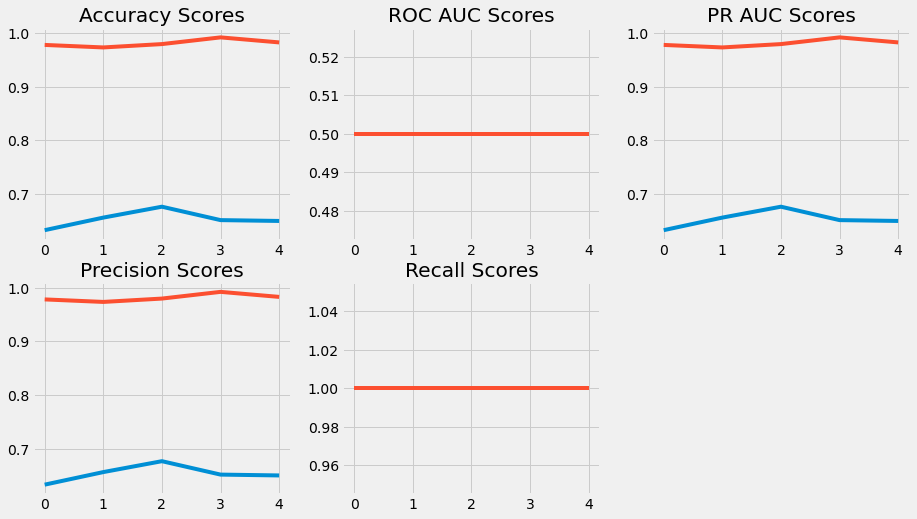

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
axs[0, 0].plot(history_2.history['accuracy'])
axs[0, 0].plot(history_2.history['val_accuracy'])
axs[0, 0].set_title('Accuracy Scores')
axs[0, 1].plot(history_2.history['auc_4'])
axs[0, 1].plot(history_2.history['val_auc_4'])
axs[0, 1].set_title('ROC AUC Scores')
axs[0, 2].plot(history_2.history['auc_5'])
axs[0, 2].plot(history_2.history['val_auc_5']) 
axs[0, 2].set_title('PR AUC Scores')
axs[1, 0].plot(history_2.history['precision_2'])
axs[1, 0].plot(history_2.history['val_precision_2'])
axs[1, 0].set_title('Precision Scores')
axs[1, 1].plot(history_2.history['recall_2'])
axs[1, 1].plot(history_2.history['val_recall_2'])
axs[1, 1].set_title('Recall Scores')
axs[-1, -1].axis('off')

# VGG16

In [25]:
vgg16 = VGG16(include_top=False, 
              weights='imagenet', 
              input_shape=(256, 256, 3))

for layer in vgg16.layers:
    layer.trainable = False

input_ = vgg16.input
output_ = vgg16(input_)
last_layer = Flatten(name='flatten')(output_)
last_layer = Dense(1, activation='sigmoid')(last_layer)
model = Model(inputs=input_, outputs=last_layer)

model.compile(optimizer = Adam(learning_rate=0.01), 
              loss = 'binary_crossentropy',
              metrics = ['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC(), tf.metrics.AUC(curve='PR')])


In [26]:
history3 = model.fit(datagen,
                     epochs = 5,
                     steps_per_epoch = 20,
                     verbose = 1,
                     validation_data = val_generator,
                     validation_steps = 20)

Epoch 1/5
20/20 [==============================] - 378s 19s/step - loss: 5.6619 - accuracy: 0.6812 - precision_3: 0.7609 - recall_3: 0.7446 - auc_6: 0.6608 - auc_7: 0.7520 - val_loss: 0.3919 - val_accuracy: 0.9719 - val_precision_3: 0.9780 - val_recall_3: 0.9936 - val_auc_6: 0.5257 - val_auc_7: 0.9792
Epoch 2/5
20/20 [==============================] - 565s 29s/step - loss: 1.0053 - accuracy: 0.8828 - precision_3: 0.8834 - recall_3: 0.9504 - auc_6: 0.8815 - auc_7: 0.8978 - val_loss: 0.4489 - val_accuracy: 0.9484 - val_precision_3: 0.9805 - val_recall_3: 0.9663 - val_auc_6: 0.7266 - val_auc_7: 0.9858
Epoch 3/5
20/20 [==============================] - 536s 27s/step - loss: 0.8678 - accuracy: 0.8812 - precision_3: 0.8971 - recall_3: 0.9233 - auc_6: 0.9124 - auc_7: 0.9251 - val_loss: 0.2373 - val_accuracy: 0.9391 - val_precision_3: 0.9934 - val_recall_3: 0.9448 - val_auc_6: 0.7112 - val_auc_7: 0.9949
Epoch 4/5
 9/20 [============>.................] - ETA: 2:10 - loss: 0.6269 - accuracy: 0.9

UnknownError:  OSError: image file is truncated (11 bytes not processed)
Traceback (most recent call last):

  File "/Users/examsherpa/opt/anaconda3/envs/nn-env/lib/python3.6/site-packages/tensorflow/python/ops/script_ops.py", line 249, in __call__
    ret = func(*args)

  File "/Users/examsherpa/opt/anaconda3/envs/nn-env/lib/python3.6/site-packages/tensorflow/python/autograph/impl/api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "/Users/examsherpa/opt/anaconda3/envs/nn-env/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 891, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/Users/examsherpa/opt/anaconda3/envs/nn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 807, in wrapped_generator
    for data in generator_fn():

  File "/Users/examsherpa/opt/anaconda3/envs/nn-env/lib/python3.6/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 933, in generator_fn
    yield x[i]

  File "<ipython-input-3-9826ca7ec8fd>", line 28, in __getitem__
    x1, y1 = generator[index % len(generator)]

  File "/Users/examsherpa/opt/anaconda3/envs/nn-env/lib/python3.6/site-packages/keras_preprocessing/image/iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/Users/examsherpa/opt/anaconda3/envs/nn-env/lib/python3.6/site-packages/keras_preprocessing/image/iterator.py", line 230, in _get_batches_of_transformed_samples
    interpolation=self.interpolation)

  File "/Users/examsherpa/opt/anaconda3/envs/nn-env/lib/python3.6/site-packages/keras_preprocessing/image/utils.py", line 138, in load_img
    img = img.resize(width_height_tuple, resample)

  File "/Users/examsherpa/opt/anaconda3/envs/nn-env/lib/python3.6/site-packages/PIL/Image.py", line 1916, in resize
    self.load()

  File "/Users/examsherpa/opt/anaconda3/envs/nn-env/lib/python3.6/site-packages/PIL/ImageFile.py", line 260, in load
    "image file is truncated "

OSError: image file is truncated (11 bytes not processed)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_106086]

Function call stack:
train_function
